### **Model Building & Training & Evaluation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectPercentile
import graphviz
from sklearn import metrics
import sys
import os
sys.path.append(os.path.abspath("../src"))
from evaluation import evaluate_model
from visualization import plot_confusion_matrix, plot_roc_curve

In [ ]:
processed_data=pd.read_csv('../data/processed/processed_data.csv')
processed_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Type_CASH_IN,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER
0,-0.885640,-0.439942,-0.379990,-0.210901,-0.247151,-0.339243,1,0,0,0,0,1
1,1.724034,-0.310520,-0.307259,-0.210901,-0.247151,-0.339243,1,0,0,0,0,1
2,-1.501813,-0.378197,-0.345291,-0.210901,-0.051399,-0.128875,1,0,1,0,0,0
3,-0.160731,0.971920,0.413437,-0.210901,2.040549,2.441135,1,0,1,0,0,0
4,0.092988,-0.438701,-0.379293,-0.210901,-0.247151,-0.339243,1,0,0,0,0,1


In [7]:
X = processed_data.drop('isFraud', axis = 1)
y = processed_data['isFraud']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8, stratify=y)

#### **KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) #Fit the model
y_pred = knn.predict(X_test) # Make predictions
y_pred=knn.fit(X_train,y_train).predict(X_test)
evaluate_model(y_test, y_pred)

Precision Score: 0.9486386138613861
Recall Score: 0.9330493000608643
Accuracy: 0.9412659768715764
F1 Score: 0.9407793801779687
AUC Score: 0.9412659768715762


**KNN & Grid Search**

In [ ]:
#Grid search
Knn2 = KNeighborsClassifier()
grid_param={'n_neighbors': range(2,21),
 'weights' : ['uniform', 'distance'],
 'metric' : ['euclidean', 'manhattan', 'minkowski']}
grid = GridSearchCV(Knn2, grid_param, cv = 10, scoring = 'accuracy')
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.947035887680582
{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')


In [ ]:
knngs =KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')
knngs.fit(X_train,y_train)
y_predgs=knngs.predict(X_test)
evaluate_model(y_test, y_predgs)

Precision Score: 0.953646477132262
Recall Score: 0.9391357273280584
Accuracy: 0.9467437614120511
F1 Score: 0.9463354799141368
AUC Score: 0.9467437614120512


**KNN & Feature Selection**

           Feature  Mutual Information Score
2    oldbalanceOrg                  0.306049
0             step                  0.291403
1           amount                  0.271653
3   newbalanceOrig                  0.160958
9     Type_PAYMENT                  0.136826
10   Type_TRANSFER                  0.112774
6     Type_CASH_IN                  0.077570
4   oldbalanceDest                  0.029201
5   newbalanceDest                  0.014955
7    Type_CASH_OUT                  0.012667
8       Type_DEBIT                  0.007158
Top selected features: 2     oldbalanceOrg
0              step
1            amount
3    newbalanceOrig
9      Type_PAYMENT
Name: Feature, dtype: object


<ipython-input-43-7635e09755e7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


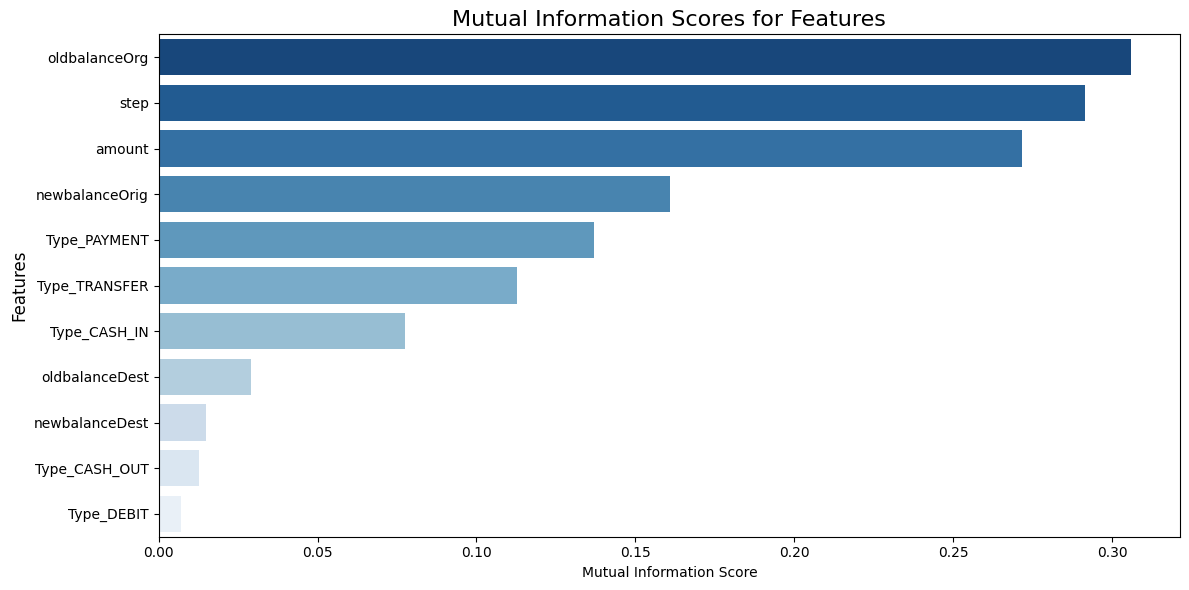

In [ ]:
#Compute mutual information scores
mutual_info = mutual_info_classif(X, y)
#Create a DataFrame for better visualization
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information Score': mutual_info
})
#Sort the features by their mutual information scores
feature_scores = feature_scores.sort_values(by='Mutual Information Score', ascending=False)
print(feature_scores)
#Select top N features
top_features = feature_scores['Feature'].head(5)
print("Top selected features:", top_features)
#Plot the scores as a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=feature_scores,
    x='Mutual Information Score',
    y='Feature',
    palette='Blues_r'
)
plt.title("Mutual Information Scores for Features", fontsize=16)
plt.xlabel("Mutual Information Score", fontsize=10)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
X_selected = X[top_features]
# Split the data into training and testing sets
X_trainSel, X_testSel, y_trainSel, y_testSel = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
knnfs =KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')
knnfs.fit(X_trainSel,y_trainSel)
y_predfs=knnfs.predict(X_testSel)
evaluate_model(y_testSel, y_predfs)

Precision Score: 0.9642644431209053
Recall Score: 0.985392574558734
Accuracy: 0.9744370054777846
F1 Score: 0.9747140276941602
AUC Score: 0.9744370054777844


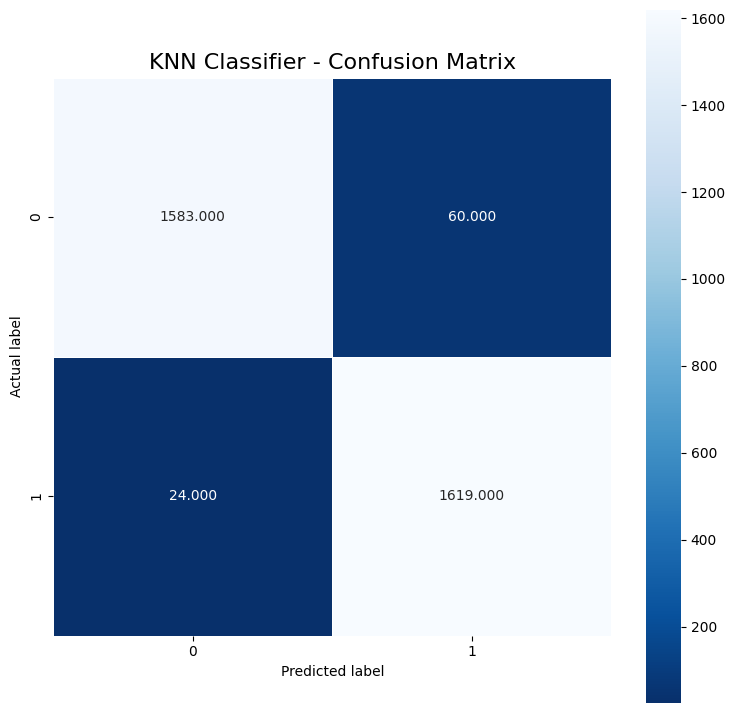

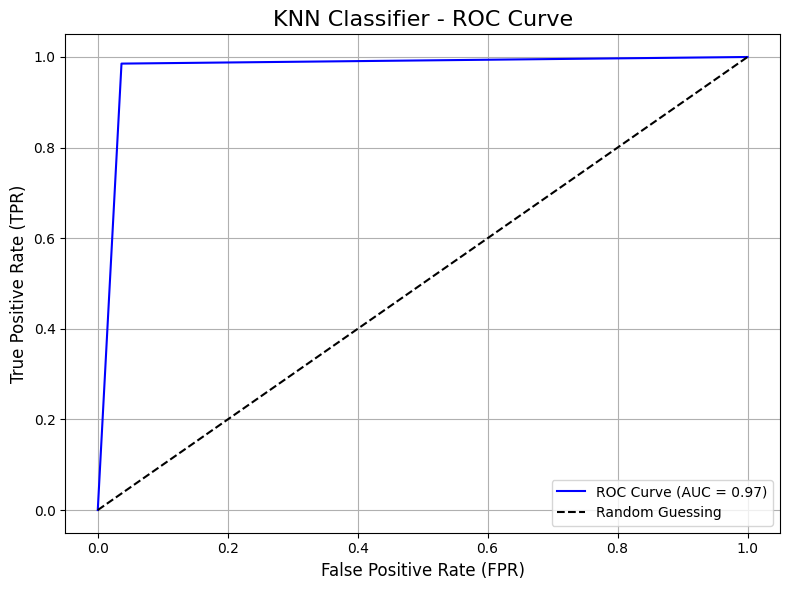

In [ ]:
plot_confusion_matrix(y_testSel, y_predfs, model_name='KNN Classifier')
plot_roc_curve(y_testSel, y_predfs, model_name='KNN Classifier')

#### **Logistic Regression**

In [ ]:
log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_train, y_train)
y_predlr = log_reg.predict(X_test)
evaluate_model(y_test, y_predlr)

Precision Score: 0.9260869565217391
Recall Score: 0.9074863055386488
Accuracy: 0.9175289105295191
F1 Score: 0.9166922840454965
AUC Score: 0.9175289105295191


**LR & Grid Search**

In [ ]:
# Grid search for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Initialize the Logistic Regression model
log_reg = LogisticRegression()
# Define the parameter grid
grid_param = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'penalty': ['l2', 'none'],          # Regularization type
    'solver': ['lbfgs', 'liblinear'],   # Solvers
    'max_iter': [100, 200, 500]         # Number of iterations
}
# Perform the grid search with cross-validation
grid = GridSearchCV(log_reg, grid_param, cv=10, scoring='accuracy')
grid.fit(X, y)
# Print the best results
print(grid.best_score_)         # Best accuracy score
print(grid.best_params_)        # Best combination of parameters
print(grid.best_estimator_)     # Best model

0.9509929550160392
{'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=100, solver='liblinear')


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

In [ ]:
log_reggs = LogisticRegression(C=100, max_iter=100, penalty='l2', solver='liblinear')
log_reggs.fit(X_train, y_train)
y_predlrgs = log_reggs.predict(X_test)
evaluate_model(y_test, y_predlrgs)

Precision Score: 0.946177370030581
Recall Score: 0.9415702982349361
Accuracy: 0.9440048691418138
F1 Score: 0.9438682123245882
AUC Score: 0.9440048691418138


**LR & Feature Selection**

In [ ]:
log_regfs = LogisticRegression(C=100, max_iter=100, penalty='l2', solver='liblinear')
log_regfs.fit(X_trainSel,y_trainSel)
y_predfs=log_regfs.predict(X_testSel)
evaluate_model(y_testSel, y_predfs)

Precision Score: 0.9389553178099433
Recall Score: 0.9080949482653682
Accuracy: 0.9245283018867925
F1 Score: 0.9232673267326733
AUC Score: 0.9245283018867924


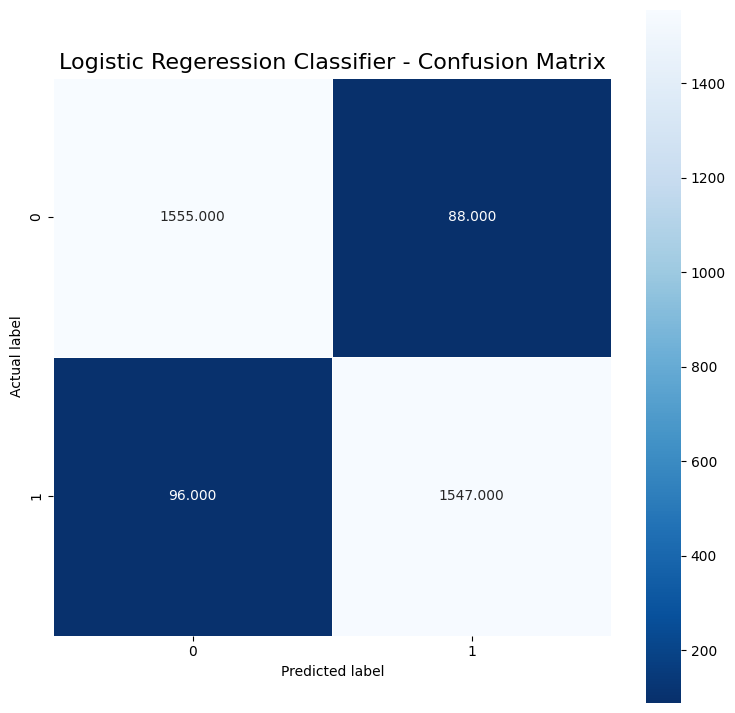

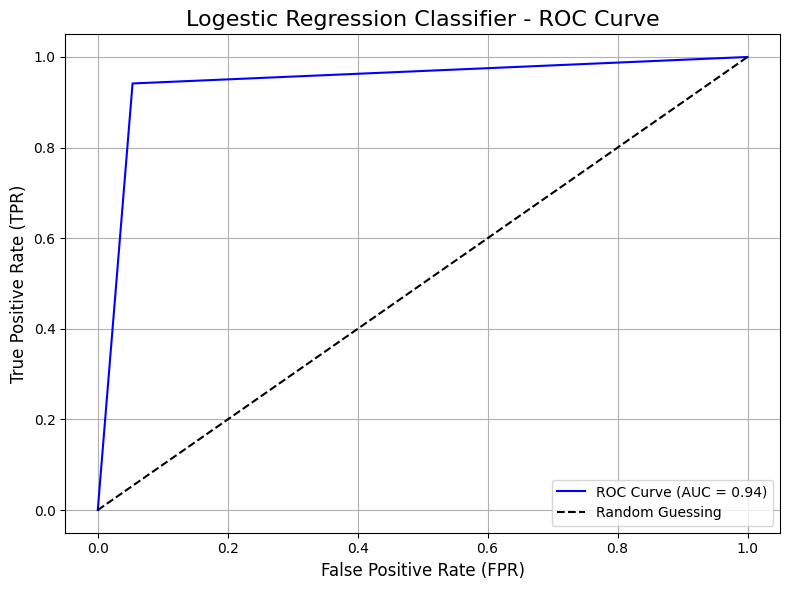

In [ ]:
plot_confusion_matrix(y_test, y_predlrgs, model_name='Logistic Regeression Classifier')
plot_roc_curve(y_test, y_predlrgs, model_name='Logestic Regression Classifier')

#### **Decision Tree**

In [ ]:
DT = DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_leaf=5,criterion='gini' ,min_impurity_decrease=0.02)
path = DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
DT.fit(X_train,y_train)
y_predDT=DT.predict(X_test)
evaluate_model(y_test, y_predDT)

Precision Score: 0.946866485013624
Recall Score: 0.8460133901399878
Accuracy: 0.8992696287279367
F1 Score: 0.8936033429765349
AUC Score: 0.8992696287279367


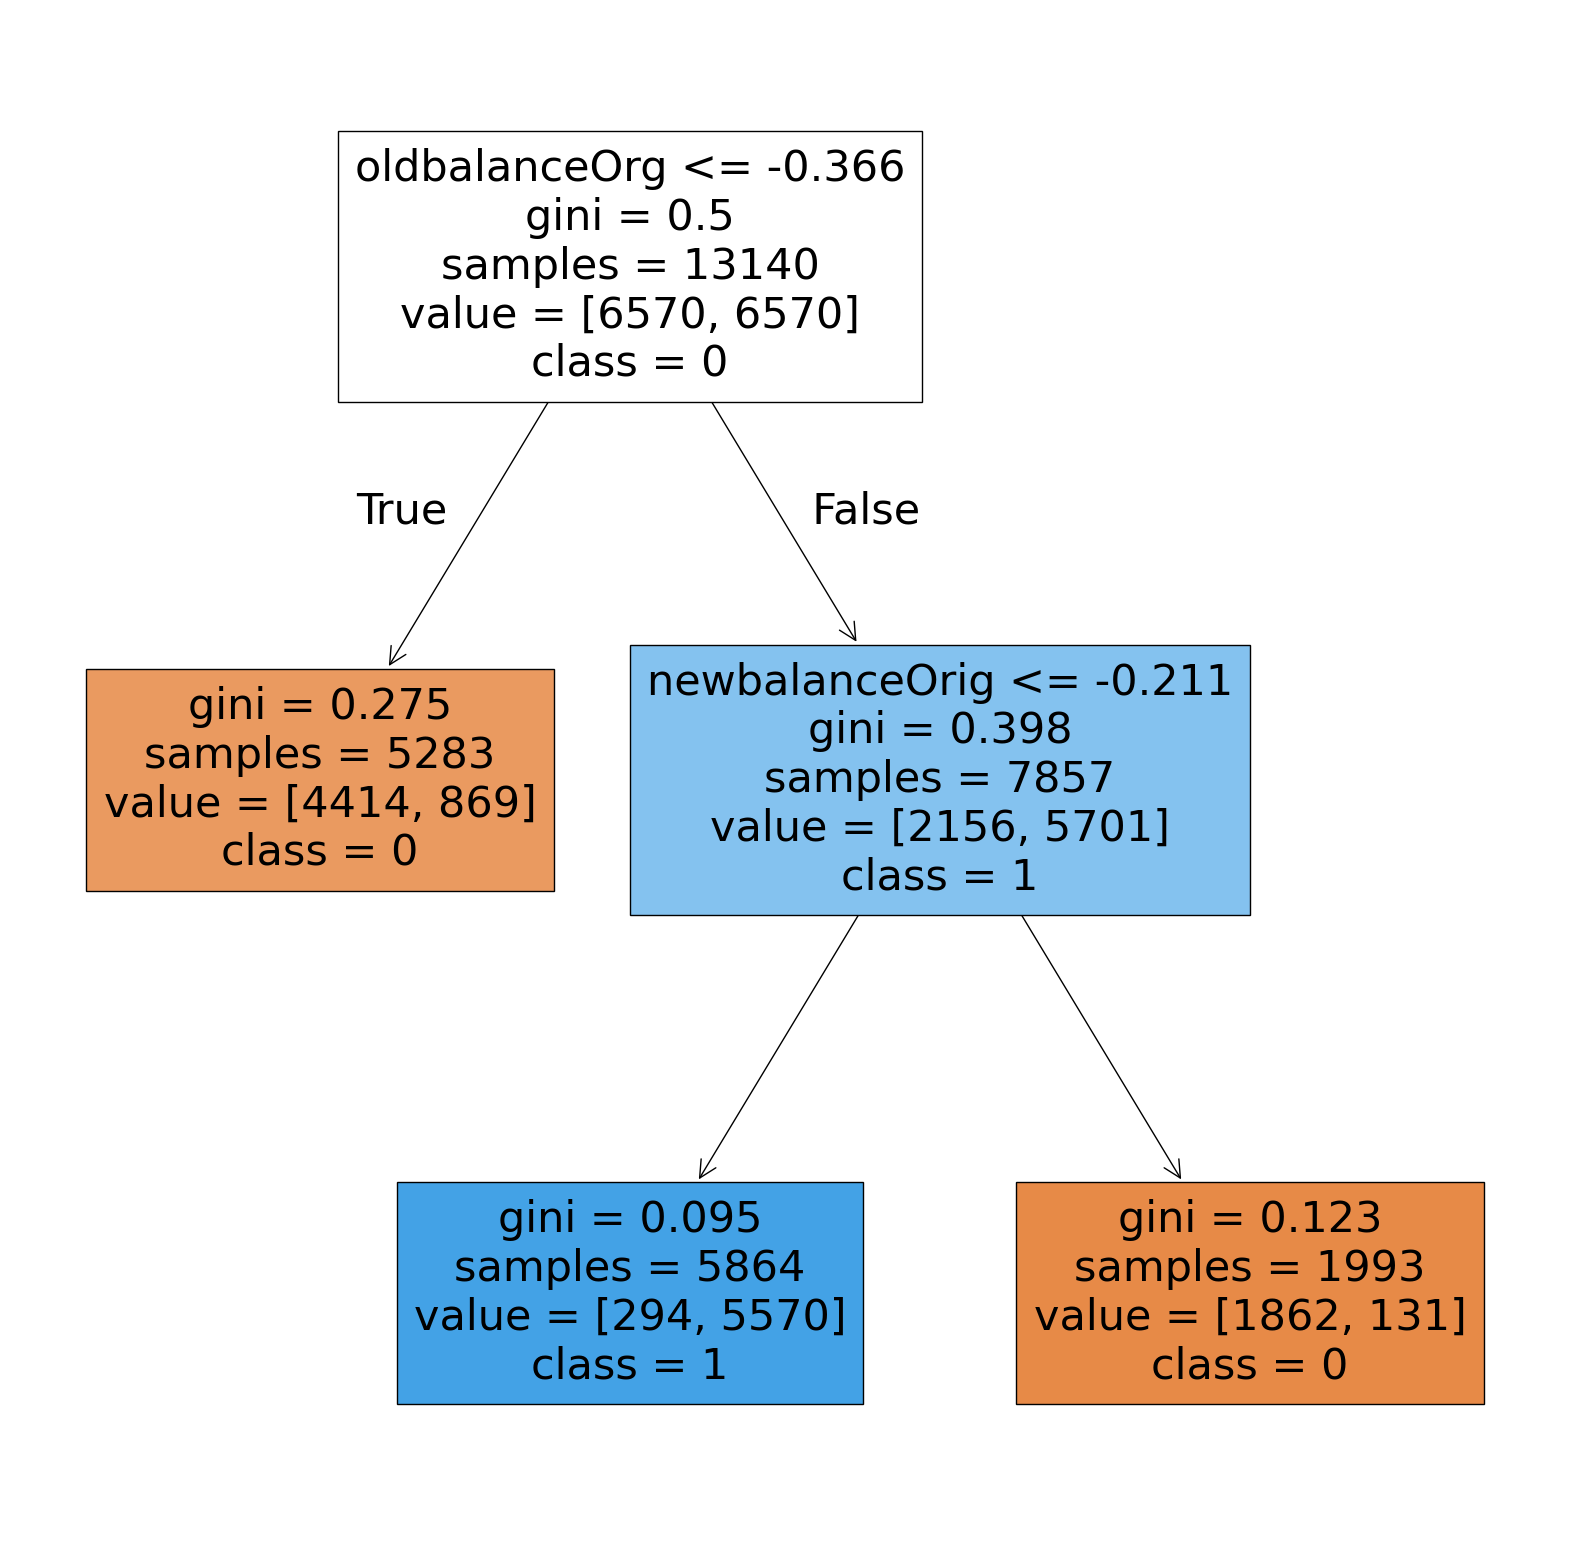

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(DT, feature_names=['step','amount',  'oldbalanceOrg',  'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','T_CASH_IN', 'T_CASH_OUT', 'T_DEBIT',  'T_PAYMENT',  'T_TRANSFER'],class_names=['0','1'],filled=True)

**DT & Grid Search**

In [ ]:
#Grid search
#creat a new KNN model
DT2 = DecisionTreeClassifier( splitter='best', max_features=11)
params = {
 'max_depth': [2, 3,4, 5, 10],
 'min_samples_leaf': [10,20,30,40, 50, 100],
 'criterion': ["gini", "entropy"],
 'min_impurity_decrease' : [0.01,0.02,0.03,0.04]
}
grid = GridSearchCV(DT2, params, cv = 10, scoring = 'accuracy')
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9733351471529085
{'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 10}
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=11,
                       min_impurity_decrease=0.01, min_samples_leaf=10)


In [ ]:
DTgs =DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=11,min_impurity_decrease=0.01, min_samples_leaf=10)
DTgs.fit(X_train,y_train)
y_predDTgs=DTgs.predict(X_test)
evaluate_model(y_test, y_predDTgs)

Precision Score: 0.9566744730679156
Recall Score: 0.9945222154595252
Accuracy: 0.9747413268411442
F1 Score: 0.9752312742464936
AUC Score: 0.9747413268411442


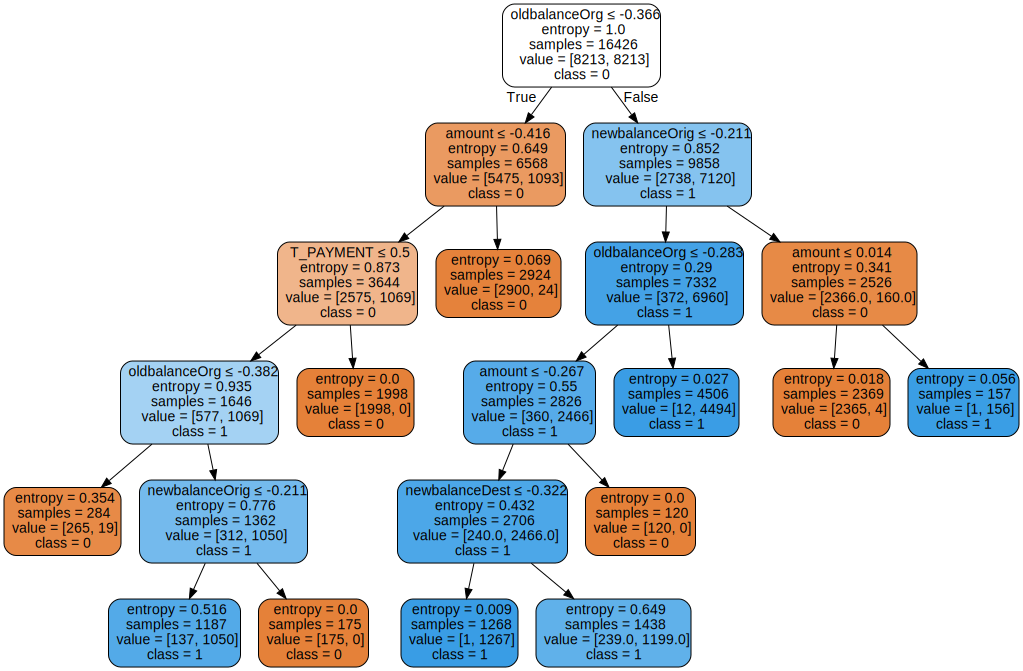

In [ ]:
dot_data = tree.export_graphviz(grid.best_estimator_, out_file=None,
                                feature_names=['step','amount',  'oldbalanceOrg',  'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','T_CASH_IN', 'T_CASH_OUT', 'T_DEBIT',  'T_PAYMENT',  'T_TRANSFER'],
                                class_names=['0','1'],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

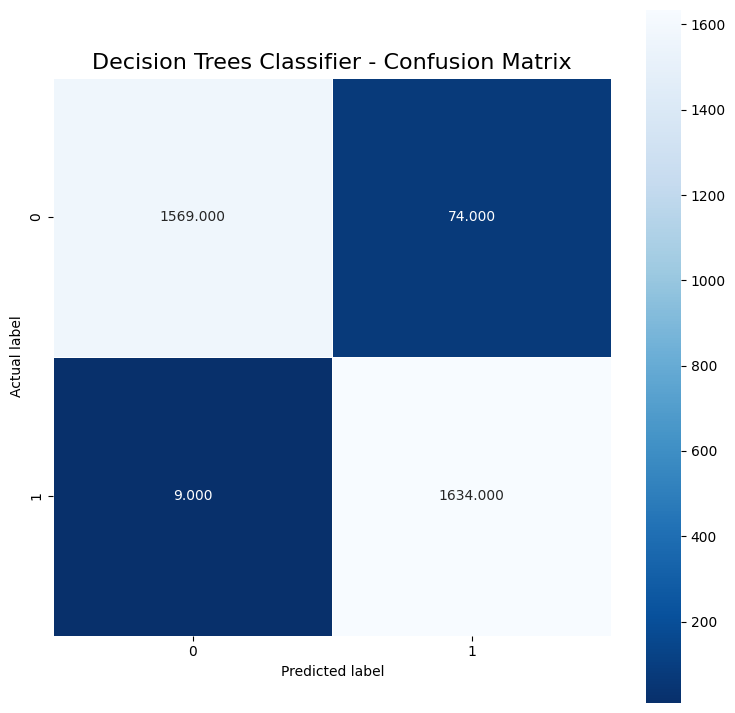

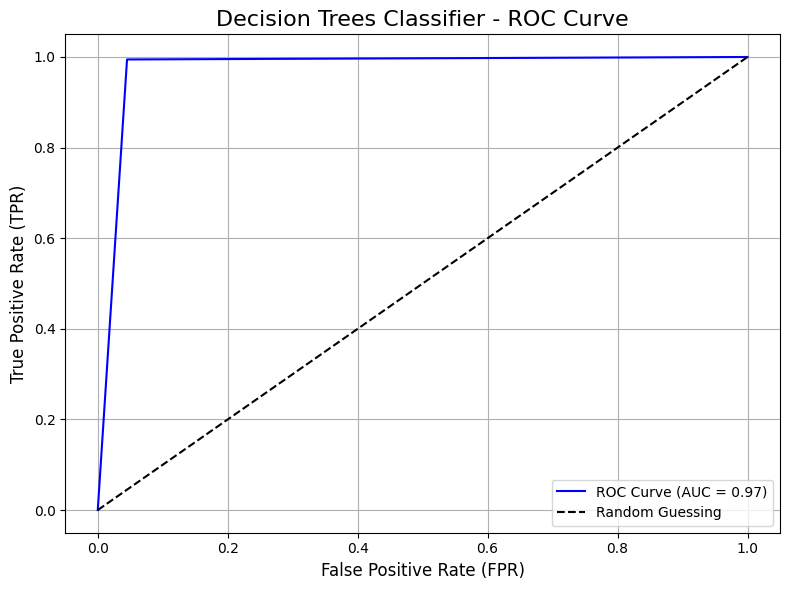

In [ ]:
plot_confusion_matrix(y_test, y_predDTgs, model_name='Decision Trees Classifier')
plot_roc_curve(y_test, y_predDTgs, model_name='Decision Trees Classifier')

#### **Random Forest**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=42) 
# Train the model
rf_model.fit(X_train, y_train)
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [ ]:
evaluate_model(y_test, y_pred_rf)

Precision Score: 0.9908925318761385
Recall Score: 0.9933049300060864
Accuracy: 0.9920876445526476
F1 Score: 0.99209726443769
AUC Score: 0.9920876445526475


**RF & Grid Search**

In [ ]:
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
# Best parameters
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.9910197869101978
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
RandomForestClassifier(n_estimators=20, random_state=42)


In [ ]:
rf_gs=RandomForestClassifier(n_estimators=20, random_state=42)
rf_model.fit(X_train, y_train)
# Make predictions
y_pred_rfgs = rf_model.predict(X_test)
evaluate_model(y_test, y_pred_rfgs)

Precision Score: 0.9908925318761385
Recall Score: 0.9933049300060864
Accuracy: 0.9920876445526476
F1 Score: 0.99209726443769
AUC Score: 0.9920876445526475


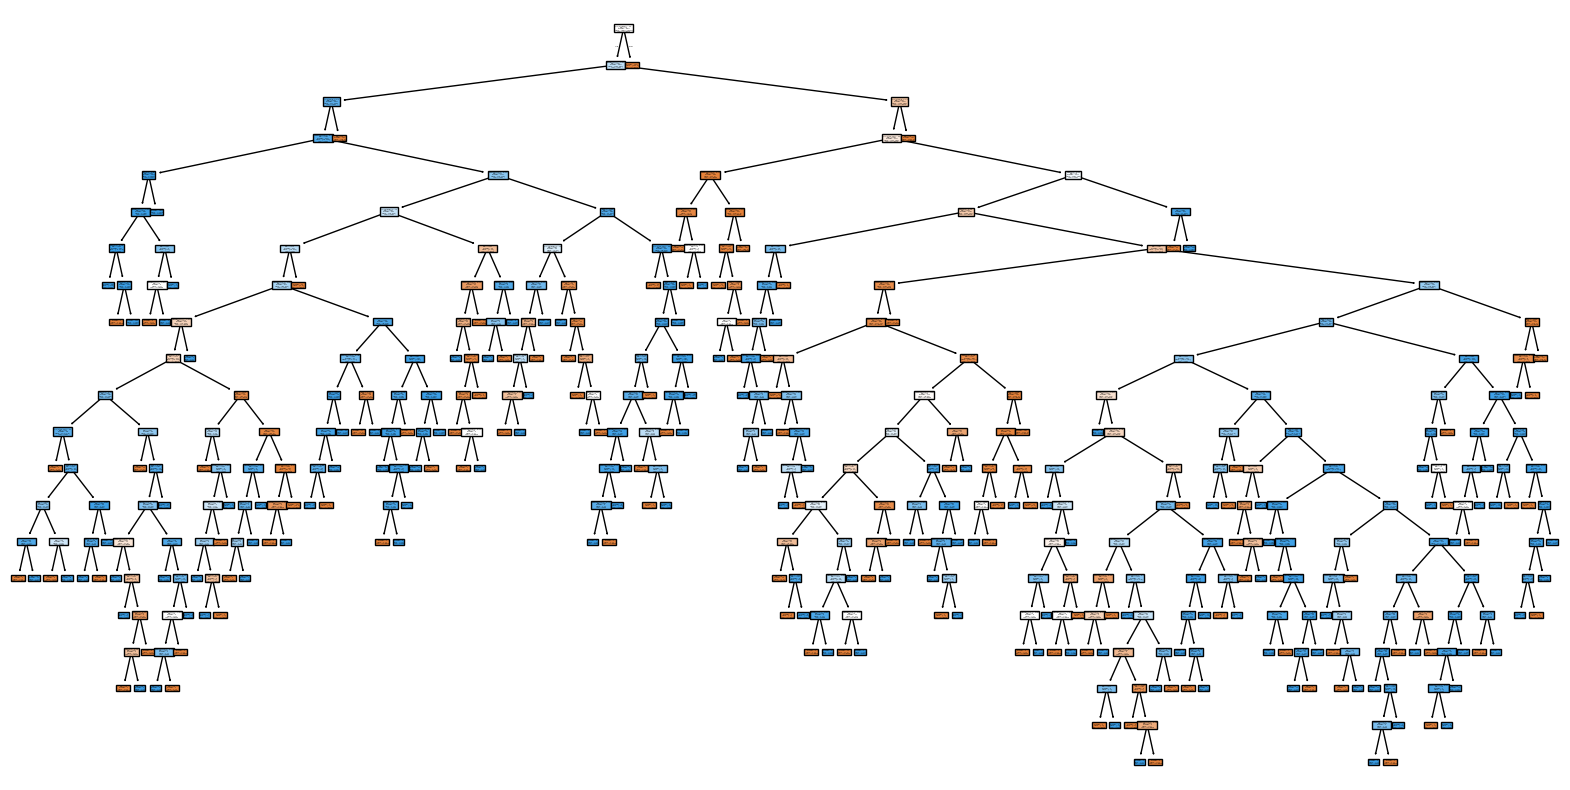

In [ ]:
from sklearn.tree import plot_tree
# Select one tree from the trained Random Forest
tree = rf_model.estimators_[0]  # First tree in the forest
# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X_train.columns, class_names=['Non-Fraud', 'Fraud'], filled=True)
plt.show()


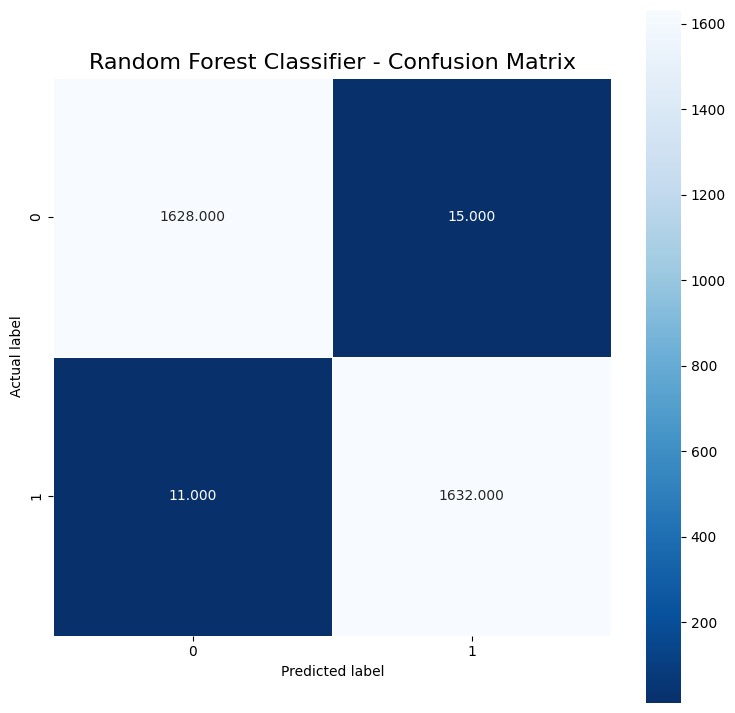

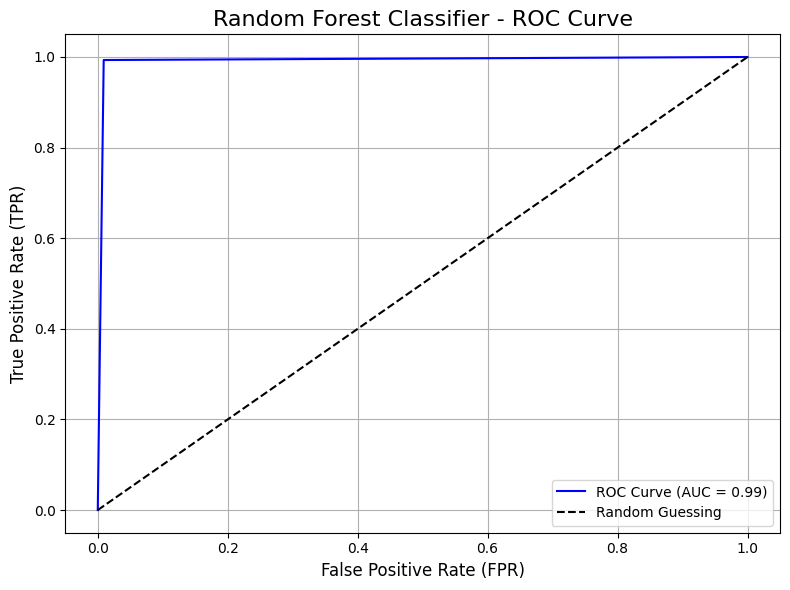

In [ ]:
plot_confusion_matrix(y_test, y_pred_rfgs, model_name='Random Forest Classifier')
plot_roc_curve(y_test, y_pred_rfgs, model_name='Random Forest Classifier')

#### **SVM**

In [ ]:
svm = SVC()
y_pred=svm.fit(X_train,y_train)
y_predsvm=svm.predict(X_test)
evaluate_model(y_test, y_predsvm)

Precision Score: 0.9570181329751511
Recall Score: 0.8673158855751674
Accuracy: 0.9141813755325624
F1 Score: 0.9099616858237548
AUC Score: 0.9141813755325625


**SVM & Grid Search**

In [ ]:
parametres = {"kernel":['linear','poly','rbf'],"C":[1.0,2.0,10.0],"gamma":['scale',0.1,0.5,1.0]}
#classifieur à utiliser
svmc = SVC()
#instanciation de la recherche
grille = GridSearchCV(estimator=svmc,param_grid=parametres,scoring="accuracy")
#lancer l'exploration
resultats = grille.fit(X_train,y_train)
print(resultats.best_params_)

{'C': 10.0, 'gamma': 1.0, 'kernel': 'poly'}


In [ ]:
svm= SVC(C=10.0, gamma=1.0, kernel='poly')
svm.fit(X_train,y_train)
y_predsvmgs=svm.predict(X_test)
evaluate_model(y_test, y_predsvmgs)

Precision Score: 0.9634002361275088
Recall Score: 0.9933049300060864
Accuracy: 0.9777845404747413
F1 Score: 0.9781240635301168
AUC Score: 0.9777845404747414


**SVM & Feature selection**

In [ ]:
svmfs= SVC(C=10.0, gamma=1.0, kernel='poly')
svmfs.fit(X_trainSel,y_trainSel)
y_predsvmfs=svmfs.predict(X_testSel)
evaluate_model(y_testSel, y_predsvmfs)

Precision Score: 0.9524739583333334
Recall Score: 0.8904443091905052
Accuracy: 0.9230066950699939
F1 Score: 0.9204152249134948
AUC Score: 0.923006695069994


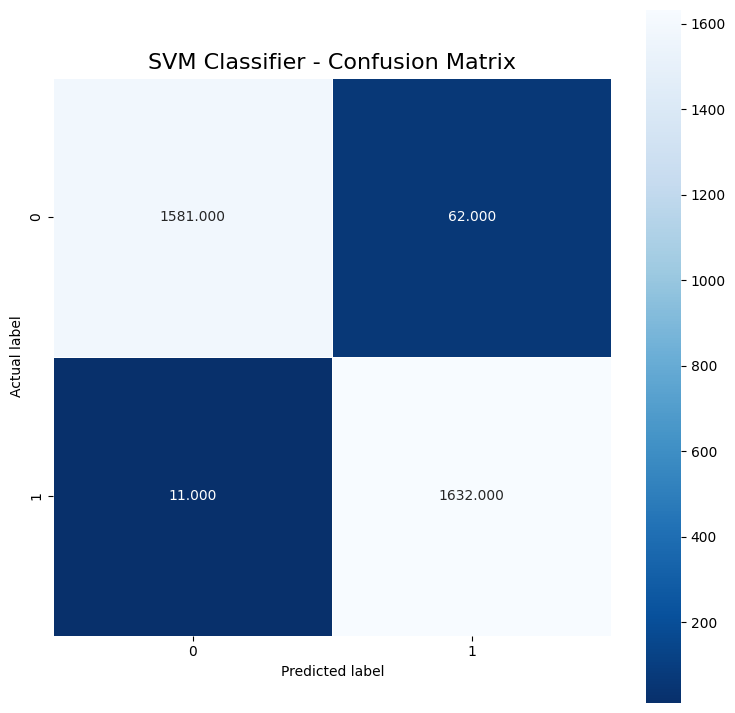

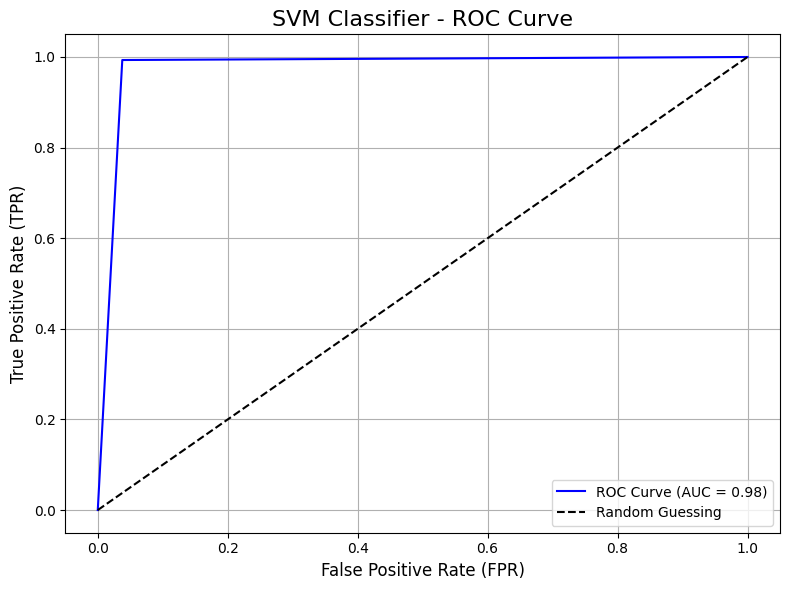

In [ ]:
plot_confusion_matrix(y_test, y_predsvmgs, model_name='SVM Classifier')
plot_roc_curve(y_test, y_predsvmgs, model_name='SVM Classifier')